In [1]:
# Preparing Data #

import urllib
import re
from bs4 import BeautifulSoup as BS
import requests
import numpy as np
import pandas as pd
import pandas_datareader as pddr
import matplotlib.pyplot as plt
import datetime
import json

from careerjet_api_client import CareerjetAPIClient

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]



pd.set_option('display.max_colwidth', -1)

cj  =  CareerjetAPIClient("en_US");

result = cj.search({
                        'location'    : 'boston',
                        'contracttype': 'p',
                        'keywords'    : 'data analyst',
                        'affid'       : '7a4b04c81d8efbc78be88a8135d28923',
                        'user_ip'     : '134.154.75.228',
                        'url'         : 'http://www.example.com/jobsearch?q=python&l=',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0',
                  
                      });
result


df0=pd.DataFrame(result['jobs'][0],index=[0])
df1=pd.DataFrame(result['jobs'][1],index=[1])
df2=pd.DataFrame(result['jobs'][2],index=[2])
df3=pd.DataFrame(result['jobs'][3],index=[3])
df4=pd.DataFrame(result['jobs'][4],index=[4])
df5=pd.DataFrame(result['jobs'][5],index=[5])
df6=pd.DataFrame(result['jobs'][6],index=[6])
df7=pd.DataFrame(result['jobs'][7],index=[7])
df8=pd.DataFrame(result['jobs'][8],index=[8])
df9=pd.DataFrame(result['jobs'][9],index=[9])
df10=pd.DataFrame(result['jobs'][10],index=[10])
df11=pd.DataFrame(result['jobs'][11],index=[11])
df12=pd.DataFrame(result['jobs'][12],index=[12])
df13=pd.DataFrame(result['jobs'][13],index=[13])
df14=pd.DataFrame(result['jobs'][14],index=[14])
df15=pd.DataFrame(result['jobs'][15],index=[15])
df16=pd.DataFrame(result['jobs'][16],index=[16])
df17=pd.DataFrame(result['jobs'][17],index=[17])
df18=pd.DataFrame(result['jobs'][18],index=[18])
df19=pd.DataFrame(result['jobs'][19],index=[19])

      
df0=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=True)

df0['new_url']=pd.Series("1")                
df0['long_description']=pd.Series("1")          
df0['python']=pd.Series("1")                  
df0['java']=pd.Series("1")                    
df0['sql']=pd.Series("1")                     
df0['c']=pd.Series("1")                       
df0['hadoop']=pd.Series("1")                   
df0['excel']=pd.Series("1")                   
df0['data']=pd.Series("1")                    
df0['develop']=pd.Series("1")                 
df0['market']=pd.Series("1")                  
df0['statistics']=pd.Series("1")              
df0['science']=pd.Series("1")                 
df0['analysis']=pd.Series("1")                

for count_a in np.arange(20):
    first_url=df0.iloc[count_a,11]
    htmlfile = urllib.urlopen(first_url)
    htmltext = htmlfile.read()
    
    regex = 'URL=(.+?)">'
    pattern = re.compile(regex)
    X = re.findall(pattern, htmltext)
    second_url=X[0]
    df0.iloc[count_a,12]=second_url
    
    htmlfile = urllib.urlopen(second_url)
    htmltext = htmlfile.read() 
    regex_1 = '<p class="new_p">(.+?)</p>'
    pattern_1 = re.compile(regex_1)
    job_description = re.findall(pattern_1, htmltext)
    regex_2 = '<ul>(.+?)</ul>'         
    pattern_2 = re.compile(regex_2)
    job_requirement = re.findall(pattern_2, htmltext)
   
    mergedlist=job_description+job_requirement
    df0.iloc[count_a,13]=mergedlist
    
    string1=''.join(str(x) for x in mergedlist)
    lower_str=string1.lower()
    splitstring= lower_str.split()
    
    for word in splitstring:
        if word== 'python':
            list1.append(word)
        elif word== 'java':
            list2.append(word)
        elif word== 'sql':
            list3.append(word)
        elif word== 'c':
            list4.append(word)      
        elif word== 'hadoop':
            list5.append(word)     
        elif word== 'excel':
            list6.append(word) 
        elif word== 'data':
            list7.append(word) 
        elif word== 'develop':
            list8.append(word)
        elif word== 'market':
            list9.append(word)      
        elif word== 'statistics':
            list10.append(word)     
        elif word== 'science':
            list11.append(word) 
        elif word== 'analysis':
            list12.append(word)  
        
        
        # skills
        df0.iloc[count_a,14]= len(list1)    # count python
        df0.iloc[count_a,15]= len(list2)    # count java
        df0.iloc[count_a,16]= len(list3)    # count sql
        df0.iloc[count_a,17]= len(list4)    # count sql
        df0.iloc[count_a,18]= len(list5)    # count c 
        df0.iloc[count_a,19]= len(list6)    # count Excel
        
        
        # keywords
        df0.iloc[count_a,20]= len(list7)    # count data
        df0.iloc[count_a,21]= len(list8)    # count develop
        df0.iloc[count_a,22]= len(list9)    # count market
        df0.iloc[count_a,23]= len(list10)   # count statistics
        df0.iloc[count_a,24]= len(list11)   # count science
        df0.iloc[count_a,25]= len(list12)   # count analysis 
        
    

In [2]:
df00=df0[[ 'company','locations','title','python','java','sql','c','hadoop','excel','data','develop', 'market', 'statistics', 'science', 'analysis']]
df00

,company,locations,title,python,java,sql,c,hadoop,excel,data,develop,market,statistics,science,analysis
0,BNY Mellon,"Boston, MA",Junior Portfolio Analyst,0,0,0,0,0,0,0,0,0,0,0,0
1,Brown Brothers Harriman,"Boston, MA",Systems Programmer Analyst,0,0,0,0,0,0,1,0,0,0,0,0
2,Brown Brothers Harriman,"Boston, MA",Relationship Management Analyst,0,0,0,0,0,0,1,0,0,0,0,0
3,Aquent,"Cambridge, MA",Research Analyst,0,0,0,0,0,0,4,0,0,0,1,1
4,Houghton Mifflin Harcourt,"Boston, MA",Business Analyst,0,0,0,0,0,0,6,4,0,0,1,3
5,NTT Data,"Boston, MA",BPPM Analyst,0,0,0,0,0,0,12,4,1,0,1,4
6,Houghton Mifflin Harcourt,"Boston, MA",IT Finance Business Analyst/Solution Manager,0,0,0,0,0,0,13,5,1,0,1,5
7,Data+Math,"Boston, MA",Data Analyst,2,0,0,0,0,0,26,5,1,0,1,7
8,"Wellington Management Company, LLP","Boston, MA",Trading Data Analyst,2,0,0,0,0,0,31,5,1,0,2,10
9,Joslin Diabetes Center,"Boston, MA",Data Analyst II (Research),2,0,0,0,0,0,34,5,1,0,2,11


In [3]:
# Save to Excel 
writer=pd.ExcelWriter('soni_boston_data_analyst.xlsx')
df00.to_excel(writer)         
writer.save()

In [4]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]



pd.set_option('display.max_colwidth', -1)

cj  =  CareerjetAPIClient("en_US");

result = cj.search({
                        'location'    : 'boston',
                        'contracttype': 'p',
                        'keywords'    : 'data scientist',
                        'affid'       : '7a4b04c81d8efbc78be88a8135d28923',
                        'user_ip'     : '134.154.75.228',
                        'url'         : 'http://www.example.com/jobsearch?q=python&l=',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0',
                  
                      });
result


df0=pd.DataFrame(result['jobs'][0],index=[0])
df1=pd.DataFrame(result['jobs'][1],index=[1])
df2=pd.DataFrame(result['jobs'][2],index=[2])
df3=pd.DataFrame(result['jobs'][3],index=[3])
df4=pd.DataFrame(result['jobs'][4],index=[4])
df5=pd.DataFrame(result['jobs'][5],index=[5])
df6=pd.DataFrame(result['jobs'][6],index=[6])
df7=pd.DataFrame(result['jobs'][7],index=[7])
df8=pd.DataFrame(result['jobs'][8],index=[8])
df9=pd.DataFrame(result['jobs'][9],index=[9])
df10=pd.DataFrame(result['jobs'][10],index=[10])
df11=pd.DataFrame(result['jobs'][11],index=[11])
df12=pd.DataFrame(result['jobs'][12],index=[12])
df13=pd.DataFrame(result['jobs'][13],index=[13])
df14=pd.DataFrame(result['jobs'][14],index=[14])
df15=pd.DataFrame(result['jobs'][15],index=[15])
df16=pd.DataFrame(result['jobs'][16],index=[16])
df17=pd.DataFrame(result['jobs'][17],index=[17])
df18=pd.DataFrame(result['jobs'][18],index=[18])
df19=pd.DataFrame(result['jobs'][19],index=[19])

      
df0=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=True)

df0['new_url']=pd.Series("1")                
df0['long_description']=pd.Series("1")          
df0['python']=pd.Series("1")                  
df0['java']=pd.Series("1")                    
df0['sql']=pd.Series("1")                     
df0['c']=pd.Series("1")                       
df0['hadoop']=pd.Series("1")                   
df0['excel']=pd.Series("1")                   
df0['data']=pd.Series("1")                    
df0['develop']=pd.Series("1")                 
df0['market']=pd.Series("1")                  
df0['statistics']=pd.Series("1")              
df0['science']=pd.Series("1")                 
df0['analysis']=pd.Series("1")                


for count_a in np.arange(20):
    first_url=df0.iloc[count_a,11]
    htmlfile = urllib.urlopen(first_url)
    htmltext = htmlfile.read()
    
    regex = 'URL=(.+?)">'
    pattern = re.compile(regex)
    X = re.findall(pattern, htmltext)
    second_url=X[0]
    df0.iloc[count_a,12]=second_url
    

    htmlfile = urllib.urlopen(second_url)
    htmltext = htmlfile.read() 
    regex_1 = '<p class="new_p">(.+?)</p>'
    pattern_1 = re.compile(regex_1)
    job_description = re.findall(pattern_1, htmltext)
    regex_2 = '<ul>(.+?)</ul>'         
    pattern_2 = re.compile(regex_2)
    job_requirement = re.findall(pattern_2, htmltext)
   

    mergedlist=job_description+job_requirement
    df0.iloc[count_a,13]=mergedlist
    
    string1=''.join(str(x) for x in mergedlist)
    lower_str=string1.lower()
    splitstring= lower_str.split()
    
    for word in splitstring:
        if word== 'python':
            list1.append(word)
        elif word== 'java':
            list2.append(word)
        elif word== 'sql':
            list3.append(word)
        elif word== 'c':
            list4.append(word)      
        elif word== 'hadoop':
            list5.append(word)     
        elif word== 'excel':
            list6.append(word) 
        elif word== 'data':
            list7.append(word) 
        elif word== 'develop':
            list8.append(word)
        elif word== 'market':
            list9.append(word)      
        elif word== 'statistics':
            list10.append(word)     
        elif word== 'science':
            list11.append(word) 
        elif word== 'analysis':
            list12.append(word)    

        # skills
        df0.iloc[count_a,14]= len(list1)    # count python
        df0.iloc[count_a,15]= len(list2)    # count java
        df0.iloc[count_a,16]= len(list3)    # count sql
        df0.iloc[count_a,17]= len(list4)    # count sql
        df0.iloc[count_a,18]= len(list5)    # count c 
        df0.iloc[count_a,19]= len(list6)    # count Excel
        
        
        # keywords
        df0.iloc[count_a,20]= len(list7)    # count data
        df0.iloc[count_a,21]= len(list8)    # count develop
        df0.iloc[count_a,22]= len(list9)    # count market
        df0.iloc[count_a,23]= len(list10)   # count statistics
        df0.iloc[count_a,24]= len(list11)   # count science
        df0.iloc[count_a,25]= len(list12)   # count analysis 

In [5]:
df01=df0[[ 'company','locations','title','python','java','sql','c','hadoop','excel','data','develop', 'market', 'statistics', 'science', 'analysis']]
df01

,company,locations,title,python,java,sql,c,hadoop,excel,data,develop,market,statistics,science,analysis
0,Pfizer,"Cambridge, MA","Principal Scientist, BioMedicine Design",0,0,0,0,0,0,0,0,0,0,0,1
1,The Hunt Corporation,"Boston, MA",Sr. Marine Scientist /Technical Leader,0,0,0,0,0,0,1,0,0,0,0,2
2,Bristol-Myers Squibb,"Cambridge, MA",Associate Research Scientist 2,0,0,0,0,0,0,3,0,0,0,0,3
3,bluebird bio,"Cambridge, MA","Associate Scientist, Stem Cell Biology",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bluebird bio,"Cambridge, MA","Associate Scientist, Lentiviral Vectors - Analytical Operations (Contract)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bluebird bio,"Cambridge, MA","Senior Associate Scientist, In Vivo Pharmacology & Toxicology",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Merck USA,"Boston, MA","Principal Scientist, Immunology Discovery",0,0,0,0,0,0,5,0,0,0,0,3
7,Merck USA,"Boston, MA","Principal Scientist, Oncology",0,0,0,0,0,0,7,0,0,0,0,3
8,Lincoln Financial,"Boston, MA",Data Scientist,0,0,0,0,0,0,16,1,0,0,1,4
9,Jefferson Frank,"Boston, MA","Data Scientist - Boston, MA - $130-160K",3,0,0,0,0,0,19,2,1,0,1,4


In [6]:
# Save to Excel 
writer=pd.ExcelWriter('soni_boston_data_scientist.xlsx')
df01.to_excel(writer)         
writer.save()

In [7]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]



pd.set_option('display.max_colwidth', -1)

cj  =  CareerjetAPIClient("en_US");

result = cj.search({
                        'location'    : 'boston',
                        'contracttype': 'p',
                        'keywords'    : 'business analyst',
                        'affid'       : '7a4b04c81d8efbc78be88a8135d28923',
                        'user_ip'     : '134.154.75.228',
                        'url'         : 'http://www.example.com/jobsearch?q=python&l=',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0',
                  
                      });
result


df0=pd.DataFrame(result['jobs'][0],index=[0])
df1=pd.DataFrame(result['jobs'][1],index=[1])
df2=pd.DataFrame(result['jobs'][2],index=[2])
df3=pd.DataFrame(result['jobs'][3],index=[3])
df4=pd.DataFrame(result['jobs'][4],index=[4])
df5=pd.DataFrame(result['jobs'][5],index=[5])
df6=pd.DataFrame(result['jobs'][6],index=[6])
df7=pd.DataFrame(result['jobs'][7],index=[7])
df8=pd.DataFrame(result['jobs'][8],index=[8])
df9=pd.DataFrame(result['jobs'][9],index=[9])
df10=pd.DataFrame(result['jobs'][10],index=[10])
df11=pd.DataFrame(result['jobs'][11],index=[11])
df12=pd.DataFrame(result['jobs'][12],index=[12])
df13=pd.DataFrame(result['jobs'][13],index=[13])
df14=pd.DataFrame(result['jobs'][14],index=[14])
df15=pd.DataFrame(result['jobs'][15],index=[15])
df16=pd.DataFrame(result['jobs'][16],index=[16])
df17=pd.DataFrame(result['jobs'][17],index=[17])
df18=pd.DataFrame(result['jobs'][18],index=[18])
df19=pd.DataFrame(result['jobs'][19],index=[19])

      
df0=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=True)

df0['new_url']=pd.Series("1")                
df0['long_description']=pd.Series("1")          
df0['python']=pd.Series("1")                  
df0['java']=pd.Series("1")                    
df0['sql']=pd.Series("1")                     
df0['c']=pd.Series("1")                       
df0['hadoop']=pd.Series("1")                   
df0['excel']=pd.Series("1")                   
df0['data']=pd.Series("1")                    
df0['develop']=pd.Series("1")                 
df0['market']=pd.Series("1")                  
df0['statistics']=pd.Series("1")              
df0['science']=pd.Series("1")                 
df0['analysis']=pd.Series("1")                


for count_a in np.arange(20):
    first_url=df0.iloc[count_a,11]
    htmlfile = urllib.urlopen(first_url)
    htmltext = htmlfile.read()
    
    regex = 'URL=(.+?)">'
    pattern = re.compile(regex)
    X = re.findall(pattern, htmltext)
    second_url=X[0]
    df0.iloc[count_a,12]=second_url
    

    htmlfile = urllib.urlopen(second_url)
    htmltext = htmlfile.read() 
    regex_1 = '<p class="new_p">(.+?)</p>'
    pattern_1 = re.compile(regex_1)
    job_description = re.findall(pattern_1, htmltext)
    regex_2 = '<ul>(.+?)</ul>'         
    pattern_2 = re.compile(regex_2)
    job_requirement = re.findall(pattern_2, htmltext)
   

    mergedlist=job_description+job_requirement
    df0.iloc[count_a,13]=mergedlist
    
    string1=''.join(str(x) for x in mergedlist)
    lower_str=string1.lower()
    splitstring= lower_str.split()
    
    for word in splitstring:
        if word== 'python':
            list1.append(word)
        elif word== 'java':
            list2.append(word)
        elif word== 'sql':
            list3.append(word)
        elif word== 'c':
            list4.append(word)      
        elif word== 'hadoop':
            list5.append(word)     
        elif word== 'excel':
            list6.append(word) 
        elif word== 'data':
            list7.append(word) 
        elif word== 'develop':
            list8.append(word)
        elif word== 'market':
            list9.append(word)      
        elif word== 'statistics':
            list10.append(word)     
        elif word== 'science':
            list11.append(word) 
        elif word== 'analysis':
            list12.append(word)    

        # skills
        df0.iloc[count_a,14]= len(list1)    # count python
        df0.iloc[count_a,15]= len(list2)    # count java
        df0.iloc[count_a,16]= len(list3)    # count sql
        df0.iloc[count_a,17]= len(list4)    # count sql
        df0.iloc[count_a,18]= len(list5)    # count c 
        df0.iloc[count_a,19]= len(list6)    # count Excel
        
        
        # keywords
        df0.iloc[count_a,20]= len(list7)    # count data
        df0.iloc[count_a,21]= len(list8)    # count develop
        df0.iloc[count_a,22]= len(list9)    # count market
        df0.iloc[count_a,23]= len(list10)   # count statistics
        df0.iloc[count_a,24]= len(list11)   # count science
        df0.iloc[count_a,25]= len(list12)   # count analysis 

In [8]:
df02=df0[[ 'company','locations','title','python','java','sql','c','hadoop','excel','data','develop', 'market', 'statistics', 'science', 'analysis']]
df02

,company,locations,title,python,java,sql,c,hadoop,excel,data,develop,market,statistics,science,analysis
0,Brown Brothers Harriman,"Boston, MA",Systems Programmer Analyst,0,0,0,0,0,0,1,0,0,0,0,0
1,Pegasystems,"Cambridge, MA",Business Consultant - Healthcare Claims,0,0,0,0,0,0,1,0,0,0,0,0
2,Brown Brothers Harriman,"Boston, MA",Relationship Management Analyst,0,0,0,0,0,0,1,0,0,0,0,0
3,Houghton Mifflin Harcourt,"Boston, MA",Business Analyst,0,0,0,0,0,0,3,4,0,0,0,2
4,Boston Scientific,"Boston, MA - Costa Rica","Analyst, Sr Financial Job",0,0,0,0,0,0,3,4,0,0,0,4
5,NTT Data,"Boston, MA",BPPM Analyst,0,0,0,0,0,0,9,4,1,0,0,5
6,Biogen,"Cambridge, MA","Business Analyst, IT Quality and Lab Automation",0,0,0,0,0,0,10,5,1,0,0,5
7,Apex Systems,"Cambridge, MA",Business Analyst,0,0,0,0,0,1,12,5,1,0,0,6
8,Anderson Frank,"Boston, MA","Business Analyst - NetSuite - Boston, MA - up to $115k DOE",0,0,0,0,0,1,12,5,1,0,0,6
9,,"Boston, MA",Senior Business System Analyst - Technology,0,0,0,0,0,1,14,5,1,0,1,9


In [9]:
# Save to Excel 
writer=pd.ExcelWriter('soni_boston_business_analyst.xlsx')
df02.to_excel(writer)         
writer.save()

In [14]:
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]



pd.set_option('display.max_colwidth', -1)

cj  =  CareerjetAPIClient("en_US");

result = cj.search({
                        'location'    : 'boston',
                        'contracttype': 'p',
                        'keywords'    : 'quantitative analyst',
                        'affid'       : '7a4b04c81d8efbc78be88a8135d28923',
                        'user_ip'     : '134.154.75.228',
                        'url'         : 'http://www.example.com/jobsearch?q=python&l=',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0',
                  
                      });
result


df0=pd.DataFrame(result['jobs'][0],index=[0])
df1=pd.DataFrame(result['jobs'][1],index=[1])
df2=pd.DataFrame(result['jobs'][2],index=[2])
df3=pd.DataFrame(result['jobs'][3],index=[3])
df4=pd.DataFrame(result['jobs'][4],index=[4])
df5=pd.DataFrame(result['jobs'][5],index=[5])
df6=pd.DataFrame(result['jobs'][6],index=[6])
df7=pd.DataFrame(result['jobs'][7],index=[7])
df8=pd.DataFrame(result['jobs'][8],index=[8])
df9=pd.DataFrame(result['jobs'][9],index=[9])
df10=pd.DataFrame(result['jobs'][10],index=[10])
df11=pd.DataFrame(result['jobs'][11],index=[11])
df12=pd.DataFrame(result['jobs'][12],index=[12])
df13=pd.DataFrame(result['jobs'][13],index=[13])
df14=pd.DataFrame(result['jobs'][14],index=[14])
df15=pd.DataFrame(result['jobs'][15],index=[15])
df16=pd.DataFrame(result['jobs'][16],index=[16])
df17=pd.DataFrame(result['jobs'][17],index=[17])
df18=pd.DataFrame(result['jobs'][18],index=[18])
df19=pd.DataFrame(result['jobs'][19],index=[19])

      
df0=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=True)

df0['new_url']=pd.Series("1")                
df0['long_description']=pd.Series("1")          
df0['python']=pd.Series("1")                  
df0['java']=pd.Series("1")                    
df0['sql']=pd.Series("1")                     
df0['c']=pd.Series("1")                       
df0['hadoop']=pd.Series("1")                   
df0['excel']=pd.Series("1")                   
df0['data']=pd.Series("1")                    
df0['develop']=pd.Series("1")                 
df0['market']=pd.Series("1")                  
df0['statistics']=pd.Series("1")              
df0['science']=pd.Series("1")                 
df0['analysis']=pd.Series("1")                


for count_a in np.arange(20):
    first_url=df0.iloc[count_a,7]
    htmlfile = urllib.urlopen(first_url)
    htmltext = htmlfile.read()
    
    regex = 'URL=(.+?)">'
    pattern = re.compile(regex)
    X = re.findall(pattern, htmltext)
    second_url=X[0]
    df0.iloc[count_a,8]=second_url
    

    htmlfile = urllib.urlopen(second_url)
    htmltext = htmlfile.read() 
    regex_1 = '<p class="new_p">(.+?)</p>'
    pattern_1 = re.compile(regex_1)
    job_description = re.findall(pattern_1, htmltext)
    regex_2 = '<ul>(.+?)</ul>'         
    pattern_2 = re.compile(regex_2)
    job_requirement = re.findall(pattern_2, htmltext)
   

    mergedlist=job_description+job_requirement
    df0.iloc[count_a,9]=mergedlist
    
    string1=''.join(str(x) for x in mergedlist)
    lower_str=string1.lower()
    splitstring= lower_str.split()
    
    for word in splitstring:
        if word== 'python':
            list1.append(word)
        elif word== 'java':
            list2.append(word)
        elif word== 'sql':
            list3.append(word)
        elif word== 'c':
            list4.append(word)      
        elif word== 'hadoop':
            list5.append(word)     
        elif word== 'excel':
            list6.append(word) 
        elif word== 'data':
            list7.append(word) 
        elif word== 'develop':
            list8.append(word)
        elif word== 'market':
            list9.append(word)      
        elif word== 'statistics':
            list10.append(word)     
        elif word== 'science':
            list11.append(word) 
        elif word== 'analysis':
            list12.append(word)    

        # skills
        df0.iloc[count_a,10]= len(list1)    # count python
        df0.iloc[count_a,11]= len(list2)    # count java
        df0.iloc[count_a,12]= len(list3)    # count sql
        df0.iloc[count_a,13]= len(list4)    # count sql
        df0.iloc[count_a,14]= len(list5)    # count c 
        df0.iloc[count_a,15]= len(list6)    # count Excel
        
        
        # keywords
        df0.iloc[count_a,16]= len(list7)    # count data
        df0.iloc[count_a,17]= len(list8)    # count develop
        df0.iloc[count_a,18]= len(list9)    # count market
        df0.iloc[count_a,19]= len(list10)   # count statistics
        df0.iloc[count_a,20]= len(list11)   # count science
        df0.iloc[count_a,21]= len(list12)   # count analysis 

In [15]:
df03=df0[[ 'company','locations','title','python','java','sql','c','hadoop','excel','data','develop', 'market', 'statistics', 'science', 'analysis']]
df03


,company,locations,title,python,java,sql,c,hadoop,excel,data,develop,market,statistics,science,analysis
0,BNY Mellon,"Boston, MA",Junior Portfolio Analyst,0,0,0,0,0,0,0,0,0,0,0,0
1,BNY Mellon,"Boston, MA",Data Intelligence Analyst - Asset Management,0,0,0,0,0,0,3,0,0,0,0,0
2,BNY Mellon,"Boston, MA",Jr. Portfolio Analyst,0,0,0,0,0,0,3,0,0,0,0,0
3,Wayfair,"Boston, MA - Berlin, MA",Quantitative Marketing Analyst,0,0,0,0,0,0,3,1,0,0,0,0
4,State Street,"Boston, MA","International Tax, Quantitative Analyst, Vice President",0,0,0,0,0,0,3,1,0,0,0,1
5,State Street,"Boston, MA","Quantitative Analyst, Model Valoidation Group,AVP",0,0,0,0,0,0,4,1,0,0,0,1
6,Wellington Management,"Boston, MA",Fixed Income & Multi-Asset Quantitative Analyst,0,0,0,0,0,0,7,1,0,0,7,1
7,Huxley,"Boston, MA",Quantitative Analyst,1,0,0,0,0,0,7,1,0,0,7,1
8,State Street,"Boston, MA",Quantitative Financial Analyst,1,0,0,0,0,0,13,1,1,1,9,2
9,State Street,"Boston, MA",Quantitative Financial Analyst - Middle Office,1,0,0,0,0,0,19,1,2,2,11,2


In [16]:
# Save to Excel 
writer=pd.ExcelWriter('soni_boston_quantitative_analyst.xlsx')
df03.to_excel(writer)         
writer.save()

In [ ]:

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list11=[]
list12=[]



pd.set_option('display.max_colwidth', -1)

cj  =  CareerjetAPIClient("en_US");

result = cj.search({
                        'location'    : 'boston',
                        'contracttype': 'p',
                        'keywords'    : 'business intelligence analyst',
                        'affid'       : 'f8627987854306848ba270b2fef703fe',
                        'user_ip'     : '134.154.75.228',
                        'url'         : 'http://www.example.com/jobsearch?q=python&l=',
                        'user_agent'  : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0',
                  
                      });
result


df0=pd.DataFrame(result['jobs'][0],index=[0])
df1=pd.DataFrame(result['jobs'][1],index=[1])
df2=pd.DataFrame(result['jobs'][2],index=[2])
df3=pd.DataFrame(result['jobs'][3],index=[3])
df4=pd.DataFrame(result['jobs'][4],index=[4])
df5=pd.DataFrame(result['jobs'][5],index=[5])
df6=pd.DataFrame(result['jobs'][6],index=[6])
df7=pd.DataFrame(result['jobs'][7],index=[7])
df8=pd.DataFrame(result['jobs'][8],index=[8])
df9=pd.DataFrame(result['jobs'][9],index=[9])
df10=pd.DataFrame(result['jobs'][10],index=[10])
df11=pd.DataFrame(result['jobs'][11],index=[11])
df12=pd.DataFrame(result['jobs'][12],index=[12])
df13=pd.DataFrame(result['jobs'][13],index=[13])
df14=pd.DataFrame(result['jobs'][14],index=[14])
df15=pd.DataFrame(result['jobs'][15],index=[15])
df16=pd.DataFrame(result['jobs'][16],index=[16])
df17=pd.DataFrame(result['jobs'][17],index=[17])
df18=pd.DataFrame(result['jobs'][18],index=[18])
df19=pd.DataFrame(result['jobs'][19],index=[19])

      
df0=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=True)

df0['new_url']=pd.Series("1")                
df0['long_description']=pd.Series("1")          
df0['python']=pd.Series("1")                  
df0['java']=pd.Series("1")                    
df0['sql']=pd.Series("1")                     
df0['c']=pd.Series("1")                       
df0['hadoop']=pd.Series("1")                   
df0['excel']=pd.Series("1")                   
df0['data']=pd.Series("1")                    
df0['develop']=pd.Series("1")                 
df0['market']=pd.Series("1")                  
df0['statistics']=pd.Series("1")              
df0['science']=pd.Series("1")                 
df0['analysis']=pd.Series("1")                


for count_a in np.arange(20):
    first_url=df0.iloc[count_a,7]
    htmlfile = urllib.urlopen(first_url)
    htmltext = htmlfile.read()
    
    regex = 'URL=(.+?)">'
    pattern = re.compile(regex)
    X = re.findall(pattern, htmltext)
    second_url=X[0]
    df0.iloc[count_a,8]=second_url
    
        
    htmlfile = urllib.urlopen(second_url)
    htmltext = htmlfile.read() 
    regex_1 = '<p class="new_p">(.+?)</p>'
    pattern_1 = re.compile(regex_1)
    job_description = re.findall(pattern_1, htmltext)
    regex_2 = '<ul>(.+?)</ul>'         
    pattern_2 = re.compile(regex_2)
    job_requirement = re.findall(pattern_2, htmltext)
   

    mergedlist=job_description+job_requirement
    df0.iloc[count_a,9]=mergedlist
    
    string1=''.join(str(x) for x in mergedlist)
    lower_str=string1.lower()
    splitstring= lower_str.split()
    
    for word in splitstring:
        if word== 'python':
            list1.append(word)
        elif word== 'java':
            list2.append(word)
        elif word== 'sql':
            list3.append(word)
        elif word== 'c':
            list4.append(word)      
        elif word== 'hadoop':
            list5.append(word)     
        elif word== 'excel':
            list6.append(word) 
        elif word== 'data':
            list7.append(word) 
        elif word== 'develop':
            list8.append(word)
        elif word== 'market':
            list9.append(word)      
        elif word== 'statistics':
            list10.append(word)     
        elif word== 'science':
            list11.append(word) 
        elif word== 'analysis':
            list12.append(word)    

        # skills
        df0.iloc[count_a,10]= len(list1)    # count python
        df0.iloc[count_a,11]= len(list2)    # count java
        df0.iloc[count_a,12]= len(list3)    # count sql
        df0.iloc[count_a,13]= len(list4)    # count sql
        df0.iloc[count_a,14]= len(list5)    # count c 
        df0.iloc[count_a,15]= len(list6)    # count Excel
        
        
        # keywords
        df0.iloc[count_a,16]= len(list7)    # count data
        df0.iloc[count_a,17]= len(list8)    # count develop
        df0.iloc[count_a,18]= len(list9)    # count market
        df0.iloc[count_a,19]= len(list10)   # count statistics
        df0.iloc[count_a,20]= len(list11)   # count science
        df0.iloc[count_a,21]= len(list12)   # count analysis 


In [18]:
df04=df0[[ 'company','locations','title','python','java','sql','c','hadoop','excel','data','develop', 'market', 'statistics', 'science', 'analysis']]
df04

,company,locations,title,python,java,sql,c,hadoop,excel,data,develop,market,statistics,science,analysis
0,Cisco Systems,"San Jose, CA",Analyst Market and Customer Insights,0,0,0,0,0,0,4,1,3,0,0,1
1,Adobe Inc,"San Jose, CA","Senior Business Systems Analyst, Information Data Services",0,0,0,0,0,0,16,1,3,0,1,1
2,ARM Holdings,"San Jose, CA",Financial Analyst,0,0,0,0,0,0,18,1,3,0,1,2
3,Splunk,"San Jose, CA - San Francisco, CA",Senior Competitive Intelligence Analyst,0,0,0,0,0,0,22,1,5,0,1,2
4,Arm,"San Jose, CA",Senior Business Systems Analyst,0,0,0,0,0,0,22,2,5,0,1,3
5,,"San Jose, CA",Senior GTM Business Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARM Holdings,"San Jose, CA",Senior Business Systems Analyst,0,0,0,0,0,0,22,2,5,0,1,3
7,Cisco Systems,"San Jose, CA",Senior GTM Business Analyst,0,0,0,0,0,0,22,3,5,0,1,3
8,Adobe,"San Jose, CA","Senior Business Systems Analyst, Information & Data Services",0,0,0,0,0,0,36,3,5,0,2,4
9,PayPal,"San Jose, CA","Business Systems Analyst, Pricing",0,0,0,0,0,0,46,3,5,0,3,5


In [19]:
# Save to Excel 
writer=pd.ExcelWriter('soni_boston_business_intelligence_analyst.xlsx')
df04.to_excel(writer)         
writer.save()

In [1]:
import urllib
import re
from bs4 import BeautifulSoup as BS
import requests
import numpy as np
import pandas as pd
import pandas_datareader as pddr
import matplotlib.pyplot as plt
import datetime
import json

# putting all dataframe together

df00=pd.read_excel('soni_boston_data_analyst.xlsx')
df01=pd.read_excel('soni_boston_data_scientist.xlsx')
df02=pd.read_excel('soni_boston_business_analyst.xlsx')
df03=pd.read_excel('soni_boston_quantitative_analyst.xlsx')
df04=pd.read_excel('soni_boston_business_intelligence_analyst.xlsx')


df_final=pd.concat([df00,df01,df02,df03,df04], ignore_index=True)

# save final dataframe
writer=pd.ExcelWriter('bs_data.xlsx')
df_final.to_excel(writer)         
writer.save()

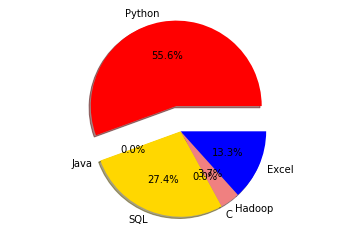

In [7]:

# getting dataframe for plotting
df_final=pd.read_excel('bs_data.xlsx')


# Get total count for each skill
python_total=df_final['python'].sum()
java_total=df_final['java'].sum()
sql_total=df_final['sql'].sum()
c_total=df_final['c'].sum()
hadoop_total=df_final['hadoop'].sum()
excel_total=df_final['excel'].sum()

# Plot for skillset

labellables = 'Python','Java','SQL', 'C', 'Hadoop','Excel'
sizes = [python_total,java_total,sql_total,c_total,hadoop_total,excel_total]
colors = ['Red','yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue']
explode = (0.3, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labellables,colors=colors,autopct='%.1f%%',pctdistance = 0.6,
        shadow=True, startangle=0,frame = False)
ax1.axis('equal')  
plt.show()  

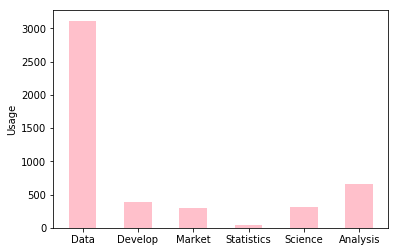

In [11]:
df00=pd.read_excel('soni_boston_data_analyst.xlsx')
df01=pd.read_excel('soni_boston_data_scientist.xlsx')
df02=pd.read_excel('soni_boston_business_analyst.xlsx')
df03=pd.read_excel('soni_boston_quantitative_analyst.xlsx')
df04=pd.read_excel('soni_boston_business_intelligence_analyst.xlsx')


# Get total count for keywords 

data_total=df_final['data'].sum()
develop_total=df_final['develop'].sum()
market_total=df_final['market'].sum()
statistics_total=df_final['statistics'].sum()
science_total=df_final['science'].sum()
analysis_total=df_final['analysis'].sum()


# Plot for keywords

objects = ('Data', 'Develop', 'Market', 'Statistics', 'Science', 'Analysis')
y_pos = np.arange(len(objects))
performance = [data_total, develop_total, market_total, statistics_total, science_total, analysis_total]
 
plt.bar(y_pos, performance, align='center',width=0.5,color='pink')     


plt.xticks(y_pos, objects)         
plt.ylabel('Usage')                

plt.show()


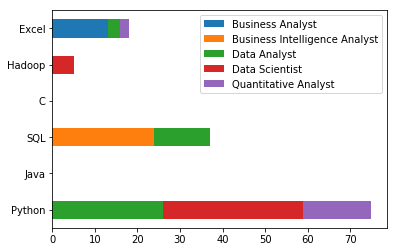

In [10]:
df00=pd.read_excel('soni_boston_data_analyst.xlsx')
df01=pd.read_excel('soni_boston_data_scientist.xlsx')
df02=pd.read_excel('soni_boston_business_analyst.xlsx')
df03=pd.read_excel('soni_boston_quantitative_analyst.xlsx')
df04=pd.read_excel('soni_boston_business_intelligence_analyst.xlsx')


data_analyst_count=[
    df00['python'].sum(), 
    df00['java'].sum(), 
    df00['sql'].sum(), 
    df00['c'].sum(), 
    df00['hadoop'].sum(), 
    df00['excel'].sum() 
]    
    
data_scientist_count=[
    df01['python'].sum(), 
    df01['java'].sum(), 
    df01['sql'].sum(), 
    df01['c'].sum(), 
    df01['hadoop'].sum(), 
    df01['excel'].sum() 
] 
  

business_analyst_count=[
    df02['python'].sum(), 
    df02['java'].sum(), 
    df02['sql'].sum(), 
    df02['c'].sum(), 
    df02['hadoop'].sum(), 
    df02['excel'].sum() 
] 



quantitative_analyst_count=[
    df03['python'].sum(), 
    df03['java'].sum(), 
    df03['sql'].sum(), 
    df03['c'].sum(), 
    df03['hadoop'].sum(), 
    df03['excel'].sum() 
] 




business_intelligence_analyst_count=[
    df04['python'].sum(), 
    df04['java'].sum(), 
    df04['sql'].sum(), 
    df04['c'].sum(), 
    df04['hadoop'].sum(), 
    df04['excel'].sum() 
] 


data={'Data Analyst': data_analyst_count, 
      'Data Scientist': data_scientist_count,
      'Quantitative Analyst': quantitative_analyst_count,
      'Business Analyst': business_analyst_count,
      'Business Intelligence Analyst': business_intelligence_analyst_count,
     }

dataframe_last=pd.DataFrame(data, index=['Python', 'Java', 'SQL', 'C', 'Hadoop', 'Excel'])
dataframe_last

# plot stacked histogram based on skillsets for each different job position
dataframe_last.plot(kind='barh', stacked=True)